# Set up the notebook
As always, we begin by setting up the coding environment.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Select a dataset
We'll work with a dataset from the 'Great American Coffee Taste Test', where Cometeer shipped 5000 flash frozen coffee kits across America for people to participate in a taste test. We'll be analyzing the results of those taste tests to learn what these participants thought about these coffee kits.

**Reference:** https://cometeer.com/pages/the-great-american-coffee-taste-test

**Scorecard:** http://bit.ly/TasteTestScoresheet

**Scoresheet PDF:**https://www.dropbox.com/scl/fi/vfvk3ojppvorxbdx5tkjk/Cometeer-James-Hoffmann-Taste-Test-Scoresheet.pdf?rlkey=0eiohjwpajys0rm7g1nma4s3h&dl=0


# Load and examine the data
Each row in the dataset corresponds to a different flower. There are four measurements: the sepal length and width, along with the petal length and width. We also keep track of the corresponding species.

In [2]:
# Path of the file to read
coffee_filepath = "/kaggle/input/lets-do-some-coffee-tasting/GACTT_RESULTS_ANONYMIZED_v2.csv"

# Read the file into a variable coffee_data
coffee_data = pd.read_csv(coffee_filepath, index_col="Submission ID")

# Display the DataFrame with all columns
coffee_data.head()

,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,How do you brew coffee at home? (Pour over),...,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Gender (please specify),Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
Submission ID,,,,,,,,,,,,,,,,,,,,,
gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BkPN0e,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W5G8jj,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean-to-cup machine,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4xWgGr,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QD27Q8,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The amount of columns is too big to display within this table view, so we're going to need to print out a list of all the column names to see what data is provided in this dataset and the column names to access them.


In [3]:
# Print all column names in a scannable list format
for col in coffee_data.columns:
    print(col)

What is your age?
How many cups of coffee do you typically drink per day?
Where do you typically drink coffee?
Where do you typically drink coffee? (At home)
Where do you typically drink coffee? (At the office)
Where do you typically drink coffee? (On the go)
Where do you typically drink coffee? (At a cafe)
Where do you typically drink coffee? (None of these)
How do you brew coffee at home?
How do you brew coffee at home? (Pour over)
How do you brew coffee at home? (French press)
How do you brew coffee at home? (Espresso)
How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))
How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))
How do you brew coffee at home? (Instant coffee)
How do you brew coffee at home? (Bean-to-cup machine)
How do you brew coffee at home? (Cold brew)
How do you brew coffee at home? (Coffee extract (e.g. Cometeer))
How do you brew coffee at home? (Other)
How else do you brew coffee at home?
On the go, where do you typica

# Visualize the data

## Who are our participants?

We're going to start by looking into some of the questions we have listed below, referring to the participants from this test and using it to make inferences about coffee drinkers around America.

1. What do we know about the participants who participated in this study?
*     Age?
*     Work?
*     Gender?
*     Household Income?
*     Ethnicity?
*     Number of Children?
2. How much coffee do these participants drink daily?
3. How do they brew their coffee at home?
3. Where do they drink their coffee typically?
5. What level of expertise do they define themselves as?
6. How strong do they like their coffee?
7. What roast level do they prefer?
8. How much caffeine do they like?

-------

## The Coffee Taste Preference Results:

1. Between Coffees A, B, C (light, medium, dark roast), which was the most popular?
2. Between Coffee A and Coffee D, which did you prefer?
3. Lastly, what was your favorite overall coffee?
4. Coffee Preference by Gender
5. Coffee Preference by Age
6. Coffee Preference by Expertise Level
7. Coffee Preference by Brewing Method
8. Coffee Preference by Coffee Level Preference

-------

## Q1.a: What is the age dristibution of the participants?

<Figure size 1200x600 with 0 Axes>

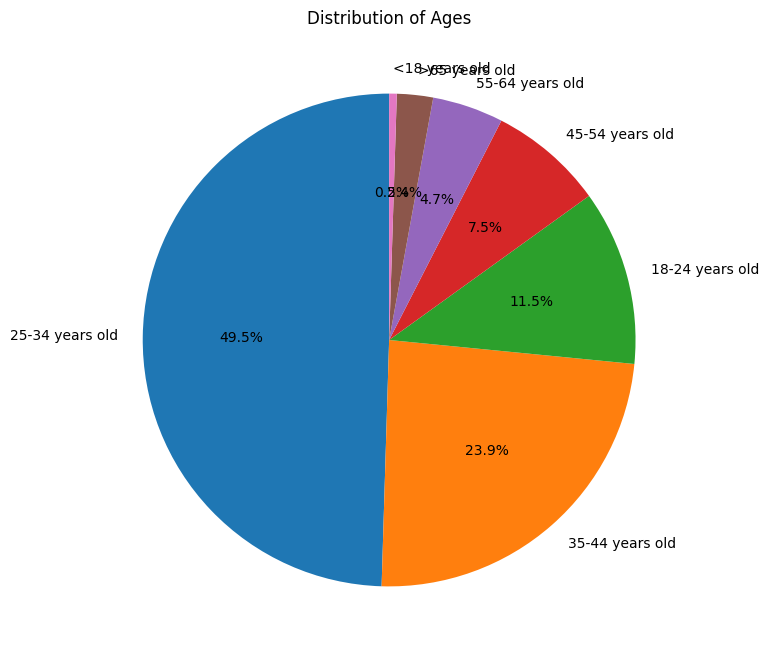

In [4]:
# Create a new plot
plt.figure(figsize=(12, 6))

# Create a pie chart of the ages
# First, get the counts of each age group
age_counts = coffee_data['What is your age?'].value_counts()

# Plot the pie chart with adjusted label font size and distance
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 10})
plt.title('Distribution of Ages')
plt.show()

**Observations**
There is a large majority of participants who categorize themselves between the ages of 25 - 34, and very few fall under the age of 18 or above the age of 65. The data shows that millenials (between the ages of 18-44) were a large portion of the set of participants.

**Insight**
This could be indicative of the current market OR it could be a misrepresentation of the population. How the participants were decided upon is out of our current understanding of the dataset, but should be considered when analyzing the results.

## Q1.b: What is their employment status?

<Figure size 1200x400 with 0 Axes>

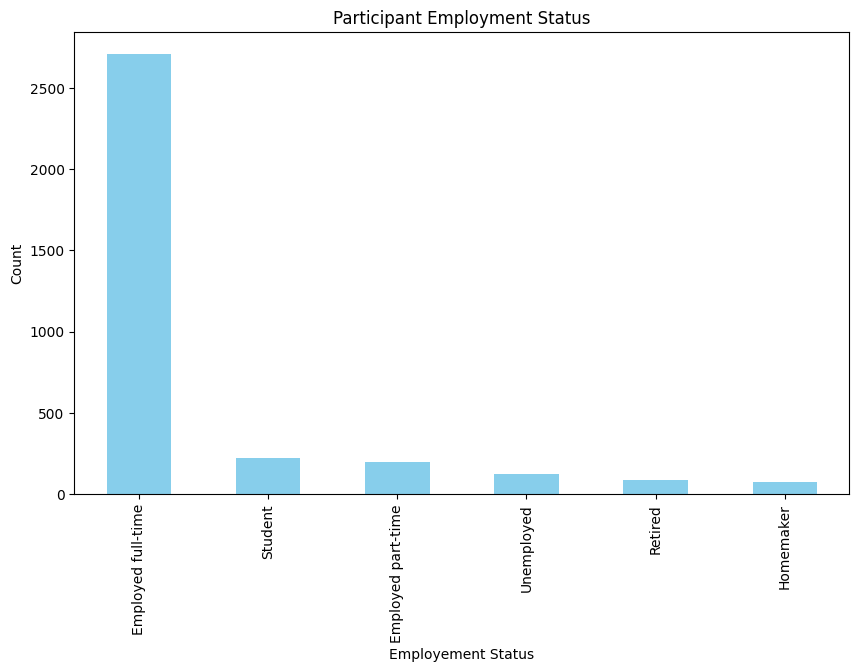

In [5]:
# Create a new plot
plt.figure(figsize=(12,4))

# Create a bar chart of the amount of coffee
status_counts = coffee_data['Employment Status'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Participant Employment Status')
plt.xlabel('Employement Status')
plt.ylabel('Count')
plt.show()

**Observations**
The histogram shows that majority of these participants work full-time, and is also likely indicative of the population, being that retirement age is small portion of the set of users we have.

**Insights**
Many coffee drinks are full-time employees. It's indicative that maybe this type of coffee is purchased by those with higher levels of income.


## Q1.c: What gender do they identify as?

<Figure size 1000x500 with 0 Axes>

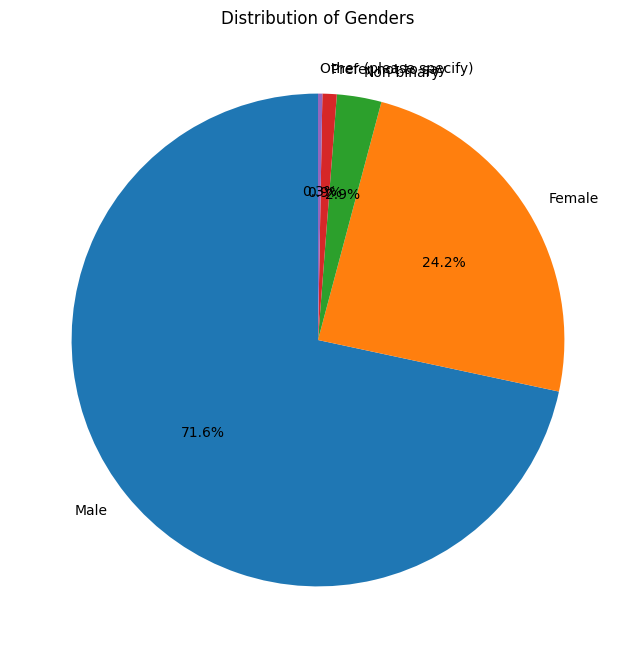

In [6]:
# Create a new plot
plt.figure(figsize=(10,5))

# Create a pie chart of the genders
# First, get the counts of each gender group
gender_counts = coffee_data['Gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genders')
plt.show()

**Observations**
Majority of the participants are male, which is not surprising given other studies on the coffee consumption market. However, we have a surprisingly large majority, which may not be a fair representation of the population, but again the participant selection proccess is unknown.

**Insights**
Either their are a larger majority of males who prefer to drink flash frozen coffee and were willing participants in this study, or the dataset is a misrepresentation of the population

## Q1.d: What ethnicity are they? (also show which gender each identifies as)

<Axes: xlabel='Ethnicity/Race', ylabel='Count'>

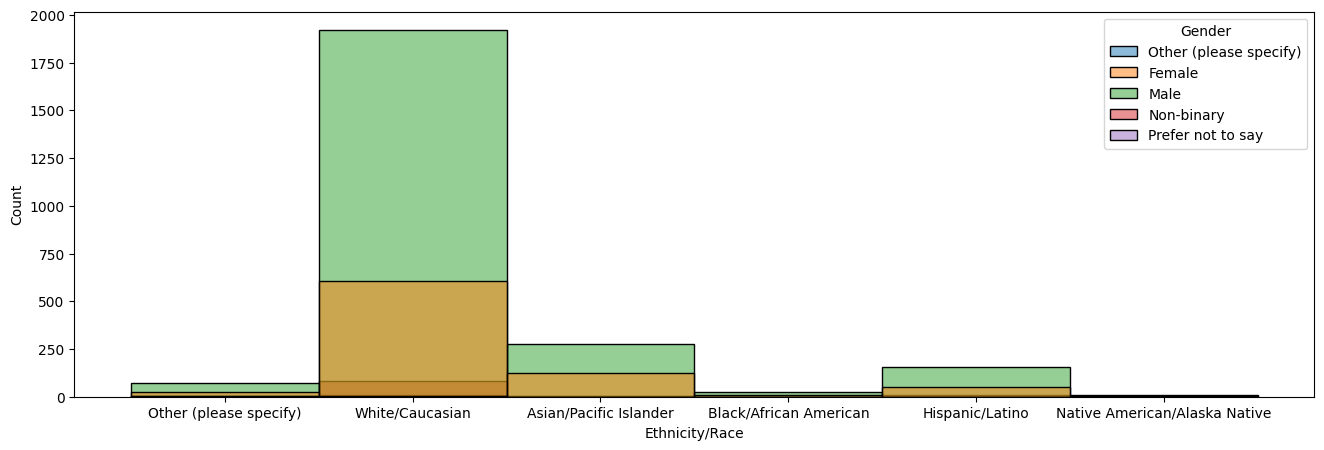

In [7]:
# Create a new plot
plt.figure(figsize=(16,5))

# Create a histogram of the ethnicity/race bins and show which gender each identifies as
sns.histplot(data=coffee_data, x="Ethnicity/Race", hue="Gender")

**Observations**
An overwhelming majority of participants identify as 'White/Caucasian'. This indicates that we likely have a large portion of these participants who are white males, which is also typically seen within the market. However, again I will point out the data set could be an unfair representation of the population, depending on the selection process.

**Insights**
There are a large majority of high earning, white males who invest in flash frozen coffee. This could also indicate that they are likely investors of higher quality/specialty coffee and would be a large target audience for this market.

## Q1.e: Do they have any children?

<Figure size 1400x600 with 0 Axes>

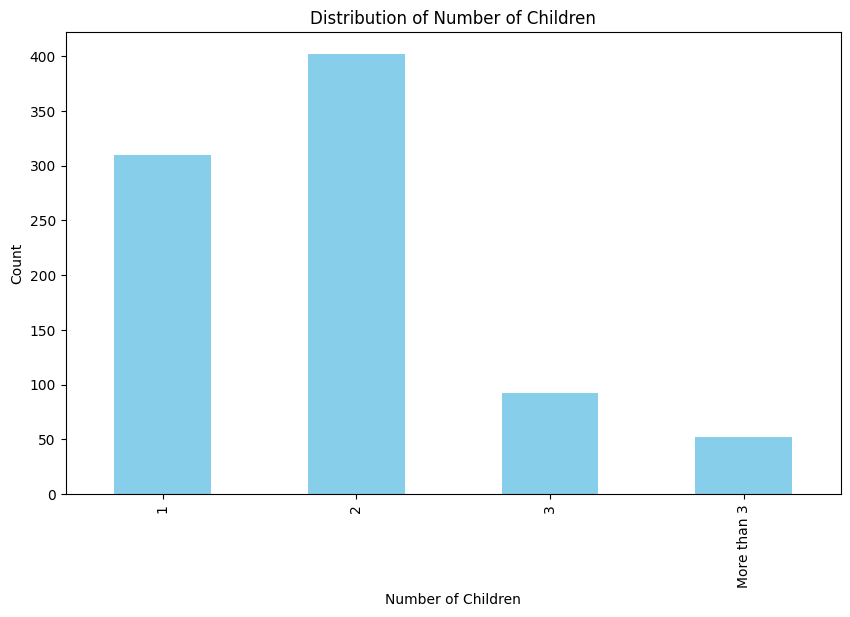

In [8]:
# Create a new plot
plt.figure(figsize=(14,6))

# Create a bar chart of the number of children
# First, get the counts of each group
kid_counts = coffee_data['Number of Children'].value_counts()

# Sort the index to display in order
kid_counts = kid_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
kid_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

**Observations**
Majority of participants have either 1 or 2 children in their household. Very few have 3 or more.

**Insights**
Majority of our participants are high earning, white male fathers who work full-time jobs.

It could be that as you progress in life and start a family, alongside that your career is growing and you're able to increase your household income. These men may also be more inclined to consume coffee on a daily basis in their home for sake of convenience and ease with maintaining work-life balance and being home for their family. They're also more likely to invest in coffee that is of greater quality than something they may have purchased on a lower budget.

This is a more specific target demographic we are looking to market towards with this type of product as they seem to be most inclined to invest in specialty coffee.

## Q2: How much coffee do they drink daily?

<Figure size 1400x600 with 0 Axes>

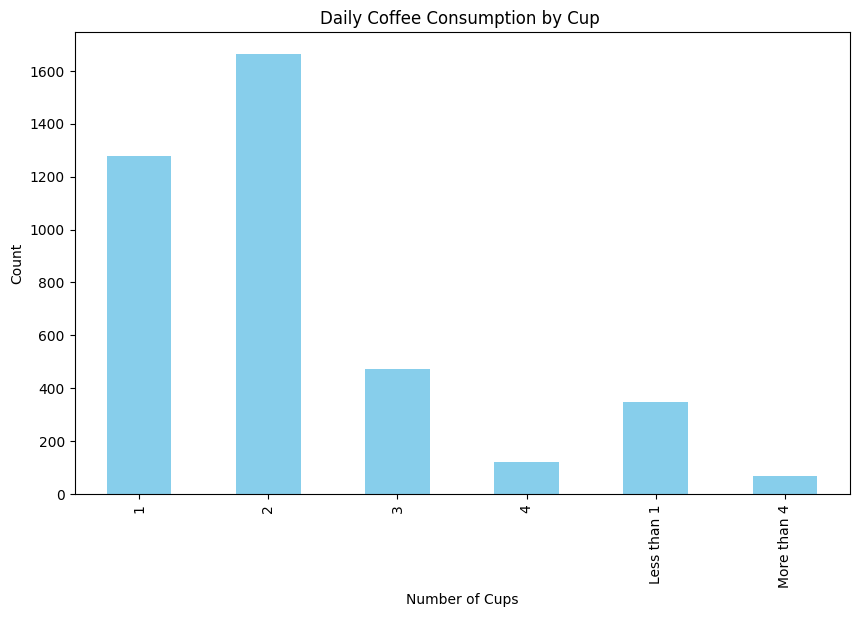

In [9]:
# Create a new plot
plt.figure(figsize=(14,6))

# Create a bar chart of the amount of coffee
cup_counts = coffee_data['How many cups of coffee do you typically drink per day?'].value_counts()

# Sort the index to display in order
cup_counts = cup_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
cup_counts.plot(kind='bar', color='skyblue')
plt.title('Daily Coffee Consumption by Cup ')
plt.xlabel('Number of Cups')
plt.ylabel('Count')
plt.show()

**Observations**
It seems that majority drink between 1 - 2 cups of coffee each day. Fewer drink less than 1 or even 3, and even fewer drink 4 or more.


## Q3: How do they brew their coffee at home?

<Figure size 2600x2600 with 0 Axes>

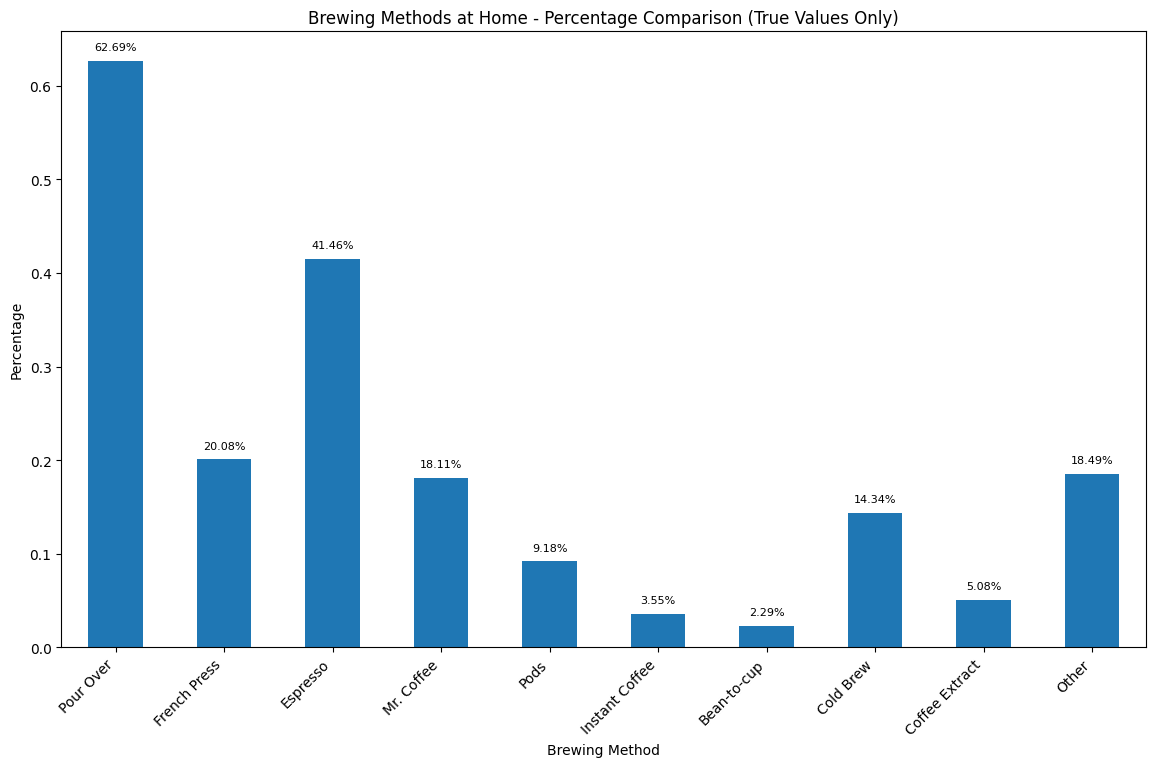

In [10]:
# Set up a grid of plots
fig = plt.figure(figsize=(26, 26))
fig_dims = (4, 3)

# Combine counts for all brewing methods into a single DataFrame
brewing_percentages = pd.DataFrame()

# List of columns representing different brewing methods
brewing_columns = [
    'How do you brew coffee at home? (Pour over)',
    'How do you brew coffee at home? (French press)',
    'How do you brew coffee at home? (Espresso)',
    'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
    'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
    'How do you brew coffee at home? (Instant coffee)',
    'How do you brew coffee at home? (Bean-to-cup machine)',
    'How do you brew coffee at home? (Cold brew)',
    'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))',
    'How do you brew coffee at home? (Other)'
]

# Custom labels for the columns
custom_labels = [
    'Pour Over', 'French Press', 'Espresso', 'Mr. Coffee',
    'Pods', 'Instant Coffee', 'Bean-to-cup', 'Cold Brew',
    'Coffee Extract', 'Other'
]

# Loop through each brewing method and calculate the percentages for True values
for brewing_method in brewing_columns:
    true_counts = coffee_data[coffee_data[brewing_method] == True][brewing_method].value_counts()
    percentages = true_counts / len(coffee_data[~coffee_data[brewing_method].isna()])
    brewing_percentages[custom_labels[brewing_columns.index(brewing_method)]] = percentages

# Plot the combined bar chart for True values with percentages on top
ax = brewing_percentages.transpose().plot(kind='bar', figsize=(14, 8))
plt.title('Brewing Methods at Home - Percentage Comparison (True Values Only)')
plt.xlabel('Brewing Method')
plt.ylabel('Percentage')

# Display percentages on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend().set_visible(False)  # Hide the legend
plt.show()

**Observations**
A lot of these coffee drinkers appear to brew from these methods:
1. Espresso
2. Pour Over
3. French Press
4. Other
5. Mr. Coffee
6. Cold Brew
And are least likely to be using these methods:
7. Pods
8. Coffee Extract
9. Instant Coffee
10. Bean-to-cup

An overwhelming majority stated they brew for **Espresso** or **Pour Over**.

**Insights**
Many of these coffee drinkers prefer hot beverages made with more intentful methods of brewing that take more time than simply a coffee maker would. This shows that they may value the craft of coffee brewing or at least the benefits of brewing with methods other than a coffee pot or instant coffee.

And although our participants are willing to invest in more advanced methods of brewing, that does not mean they drink more than 1 - 2 cups of coffee daily. So the method of brewing likely does not have any impact on how much coffee someone drinks each day. This is very insightful for understanding consumption behavior.

## Q4: Where would they purchase their coffee on the go?

<Axes: title={'center': 'Other'}, xlabel='On the go, where do you typically purchase coffee? (Other)'>

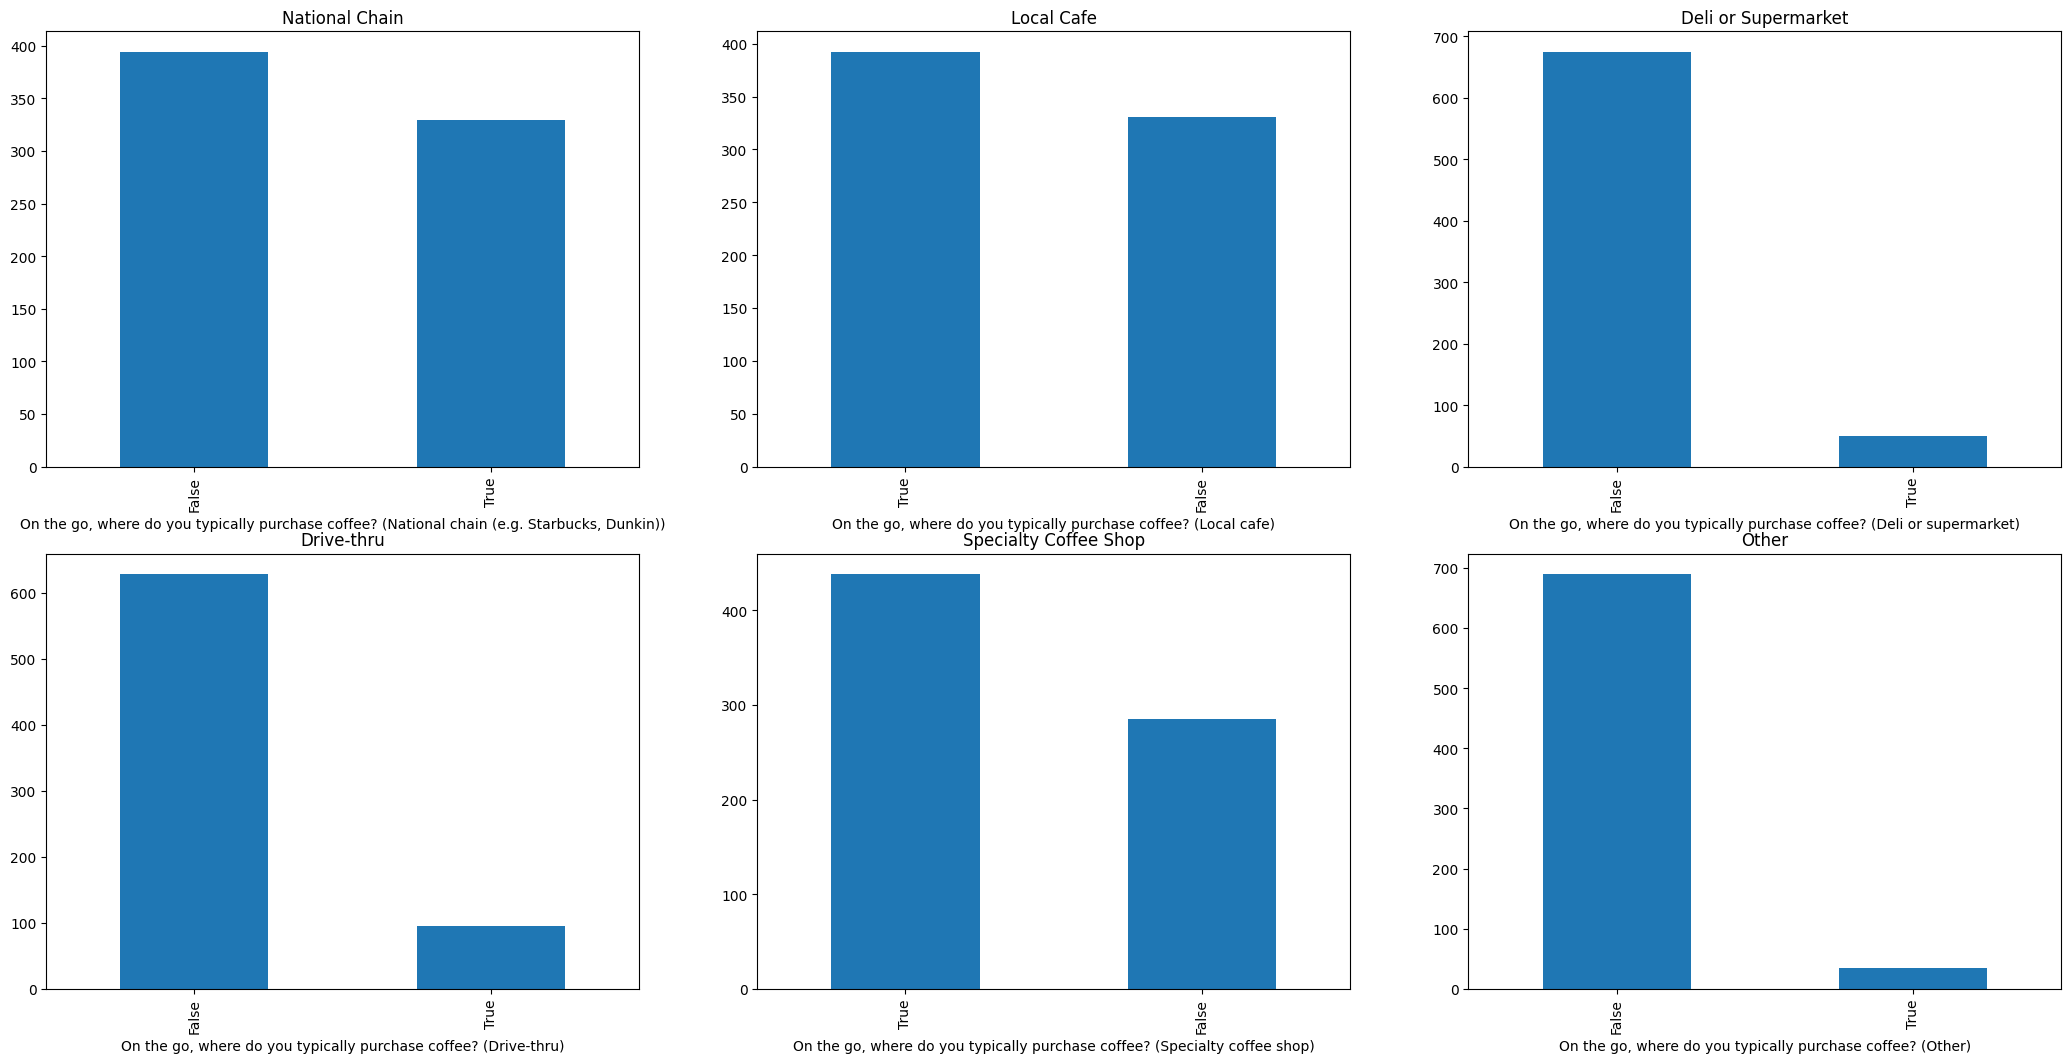

In [11]:
# Set up a grid of plots
fig = plt.figure(figsize=(26,26)) 
fig_dims = (4, 3)

# Plot count of different places for grabbing coffee on the go
plt.subplot2grid(fig_dims, (0, 0))
coffee_data['On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))'].value_counts().plot(kind='bar', 
                                     title='National Chain')
plt.subplot2grid(fig_dims, (0, 1))
coffee_data['On the go, where do you typically purchase coffee? (Local cafe)'].value_counts().plot(kind='bar', 
                                     title='Local Cafe')
plt.subplot2grid(fig_dims, (1, 0))
coffee_data['On the go, where do you typically purchase coffee? (Drive-thru)'].value_counts().plot(kind='bar', 
                                     title='Drive-thru')
plt.subplot2grid(fig_dims, (1, 1))
coffee_data['On the go, where do you typically purchase coffee? (Specialty coffee shop)'].value_counts().plot(kind='bar', 
                                     title='Specialty Coffee Shop')
plt.subplot2grid(fig_dims, (0, 2))
coffee_data['On the go, where do you typically purchase coffee? (Deli or supermarket)'].value_counts().plot(kind='bar', 
                                     title='Deli or Supermarket')
plt.subplot2grid(fig_dims, (1, 2))
coffee_data['On the go, where do you typically purchase coffee? (Other)'].value_counts().plot(kind='bar', 
                                     title='Other')

**Observations**
People are grabbing coffee Local cafes and Specialty coffee shops, but are also still fairly likely to visit a National chain such as Starbucks or Dunkin. 

**Insights**
This indicates that although Starbucks and Dunkin may not be considered "higher quality" coffee, that does not deter some people from ordering coffee from them.

It could be that while 'on the go' the person may not worry so much about the craft of brewing coffee as they trust the barista behind the counter to produce a quality product, and that they don't see Starbucks and Dunkin as poor quality.

Another possiblity is that while 'on the go' they are willing to purchase coffee from any shop nearby to satisfy their caffeine intake. Meaning, the quality of coffee can vary and they are willing to sacrifice quality for unmet needs.

## Q5: What level of expertise do they define themselves as?

<Figure size 1000x400 with 0 Axes>

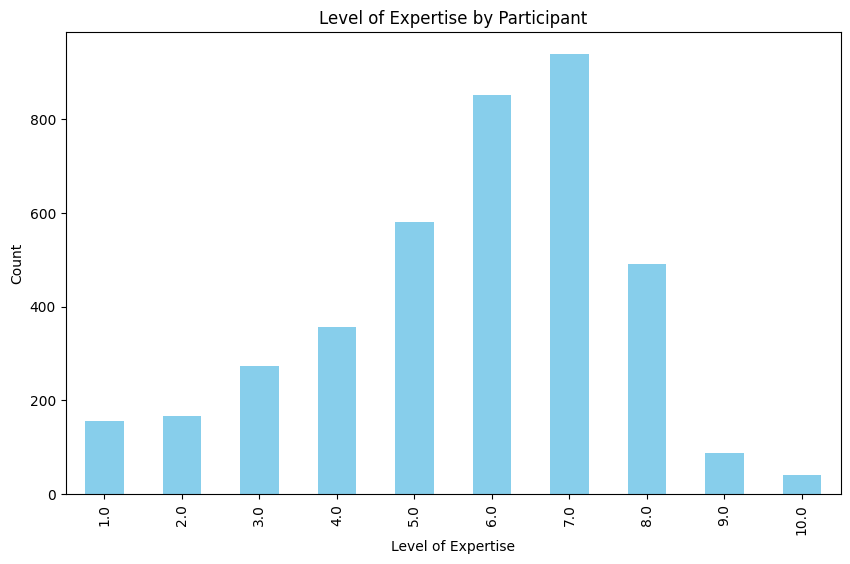

In [12]:
# Create a new plot
plt.figure(figsize=(10,4))

# Create a bar chart of the amount of coffee
lvl_counts = coffee_data['Lastly, how would you rate your own coffee expertise?'].value_counts()

# Sort the index to display in order
lvl_counts = lvl_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
lvl_counts.plot(kind='bar', color='skyblue')
plt.title('Level of Expertise by Participant')
plt.xlabel('Level of Expertise')
plt.ylabel('Count')
plt.show()

**Observations**
A large majority of the distribution peaks at 7, with a fair spread between 5 - 8. 

**Insights**
This indicates that many of these participants in the group are familiar enough with coffee or at least their understanding of it to a moderate or intermediate/advanced level of familiarity. 

This may come in handy when looking at other data in the dataset.

## Q6: How strong do you like your coffee?

<Figure size 1000x400 with 0 Axes>

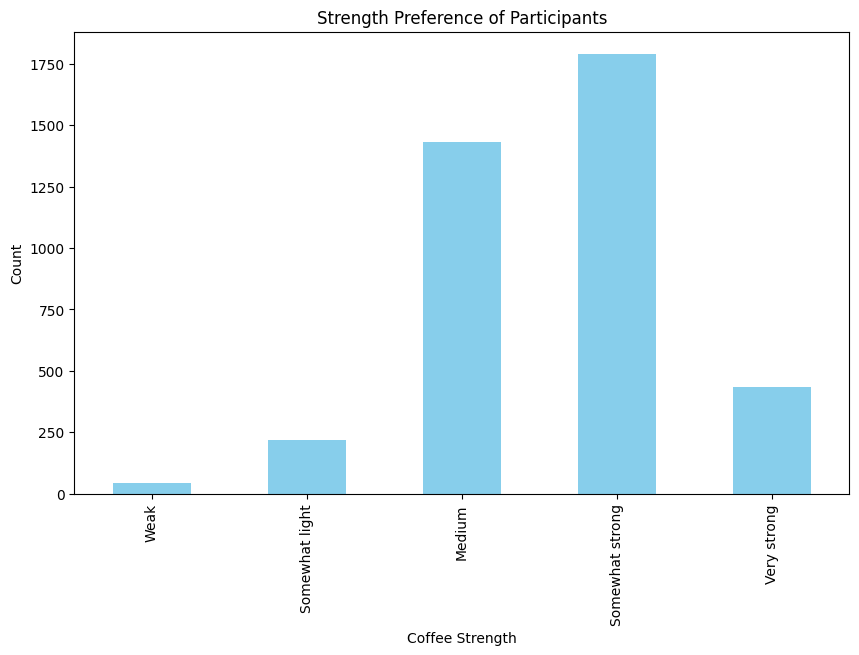

In [13]:
# Create a new plot
plt.figure(figsize=(10,4))

# Define custom order for the levels of coffee strength
custom_order = ['Weak', 'Somewhat light', 'Medium', 'Somewhat strong', 'Very strong']

# Create a bar chart of how strong participants like their coffee
str_counts = coffee_data['How strong do you like your coffee?'].value_counts()

# Create a categorical data type with the custom order
str_counts.index = pd.CategoricalIndex(str_counts.index, categories=custom_order, ordered=True)

# Sort the values based on the custom order
str_counts = str_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
str_counts.plot(kind='bar', color='skyblue')
plt.title('Strength Preference of Participants')
plt.xlabel('Coffee Strength')
plt.ylabel('Count')
plt.show()

**Observations**
Majority either voted 'Somewhat strong' or 'Medium'.

**Insights**
It's interesting that the 'Somewhat strong' category is the highest count of the options. It indicates that the coffee:water ratio likely leans more towards having a higher water content, which is an interesting thing to note.

## Q7: What roast level of coffee do you prefer?

<Figure size 800x400 with 0 Axes>

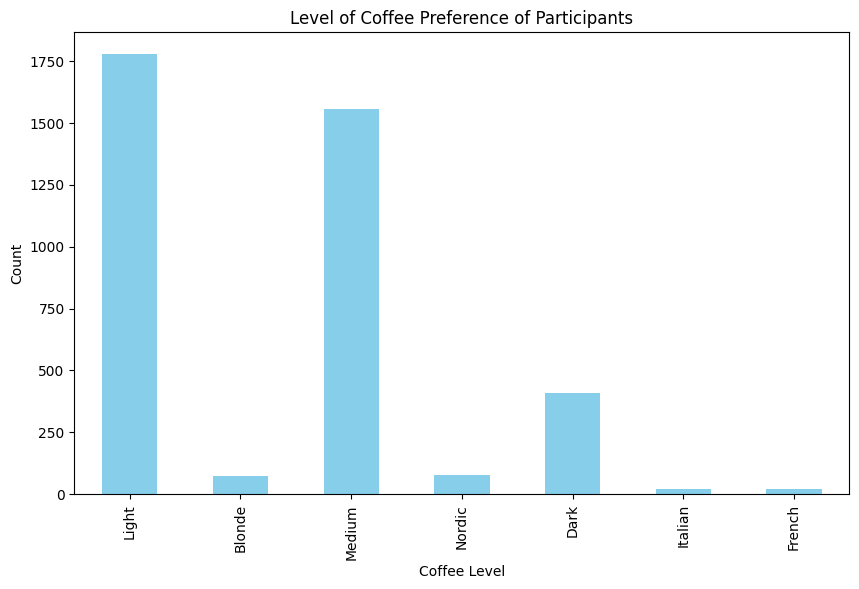

In [14]:
# Create a new plot
plt.figure(figsize=(8,4))

# Define custom order for the levels of coffee strength
custom_order = ['Light', 'Blonde', 'Medium', 'Nordic', 'Dark', 'Italian', 'French']

# Create a bar chart of how strong participants like their coffee
str_counts = coffee_data['What roast level of coffee do you prefer?'].value_counts()

# Create a categorical data type with the custom order
str_counts.index = pd.CategoricalIndex(str_counts.index, categories=custom_order, ordered=True)

# Sort the values based on the custom order
str_counts = str_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
str_counts.plot(kind='bar', color='skyblue')
plt.title('Level of Coffee Preference of Participants')
plt.xlabel('Coffee Level')
plt.ylabel('Count')
plt.show()

**Observations**
A larger portion of participants stated that 'Light' roast was their preferred roast level, next to 'Medium' and 'Dark' being far behind.

**Insights**
This is also interesting to note, but not surprising. Light roasts tend to be known for having more noticeable tasting notes and variety as well.

## Q8: How much caffeine do you like in your coffee?

<Figure size 600x400 with 0 Axes>

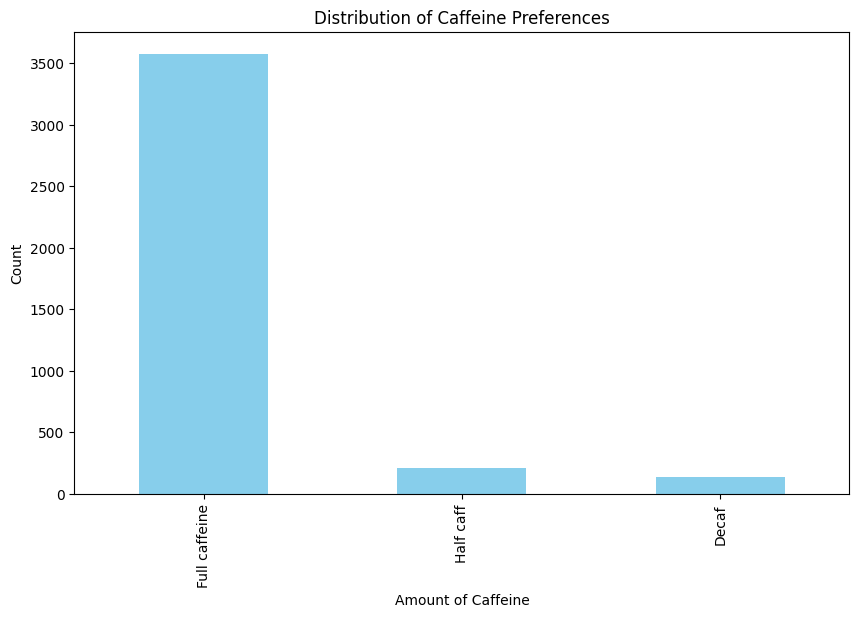

In [15]:
# Create a new plot
plt.figure(figsize=(6,4))

# Create a bar chart of caffeine preference
# First, get the counts of each group
caf_counts = coffee_data['How much caffeine do you like in your coffee?'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
caf_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Caffeine Preferences')
plt.xlabel('Amount of Caffeine')
plt.ylabel('Count')
plt.show()

**Observations**
No surprise here, 'Full caffeine' was the large majority vote.

**Insights**
Our participant group is a majority of coffee drinkers looking for their daily caffeine intake.

# Visualize The Results

Here's our list of columns we can use for reference:
* Coffee A - Bitterness
* Coffee A - Acidity
* Coffee A - Personal Preference
* Coffee A - Notes
* Coffee B - Bitterness
* Coffee B - Acidity
* Coffee B - Personal Preference
* Coffee B - Notes
* Coffee C - Bitterness
* Coffee C - Acidity
* Coffee C - Personal Preference
* Coffee C - Notes
* Coffee D - Bitterness
* Coffee D - Acidity
* Coffee D - Personal Preference
* Coffee D - Notes
* Between Coffee A, Coffee B, and Coffee C which did you prefer?
* Between Coffee A and Coffee D, which did you prefer?
* Lastly, what was your favorite overall coffee?

## Between Coffees A, B, C (Light, Medium, Dark roast), which was the most popular?

<Figure size 600x400 with 0 Axes>

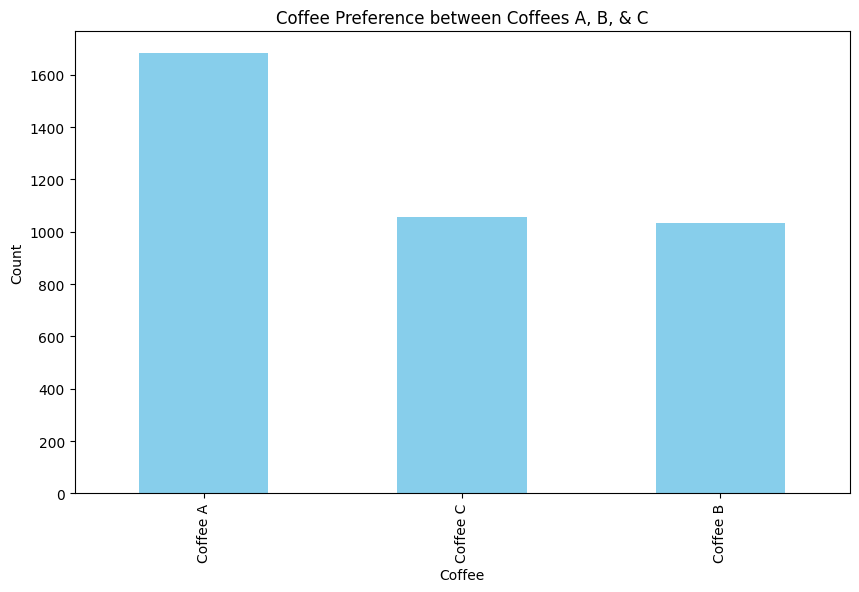

In [16]:
# Create a new plot
plt.figure(figsize=(6,4))

# Create a bar chart of the Coffees to see which had the most votes
# First, get the counts of each group
c_counts = coffee_data['Between Coffee A, Coffee B, and Coffee C which did you prefer?'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
c_counts.plot(kind='bar', color='skyblue')
plt.title('Coffee Preference between Coffees A, B, & C')
plt.xlabel('Coffee')
plt.ylabel('Count')
plt.show()

**Observation:** Coffee A (Light roast) won by a majority, with Coffee C (Dark roast) & B (Medium roast) being a near close tie for 2nd.
**Insights:** From our results shown earlier, we saw a similar majority of participants express their interest more so for Light roasts, so this translates well with these results. However, we saw the 2nd most preferred roast was Medium roast, with Dark roast being a very small portion of participant votes.

This shows that while some participants may prefer Medium roast over Dark roast, their taste preferences in this test indicate otherwise. 

It could be that each participant has their own perception of how a Medium / Dark roast ought to taste, and there are also varying blends of Medium, Medium - Dark, Dark, Extra-Dark which could lend itself towards a participant's understanding of the two.

## Between Coffee A and Coffee D, which did you prefer?

**Note:** Coffee A is a Light Roast - Washed while Coffee D is a Light Roast - Natural to determine Preference for Fruitiness.

<Figure size 600x400 with 0 Axes>

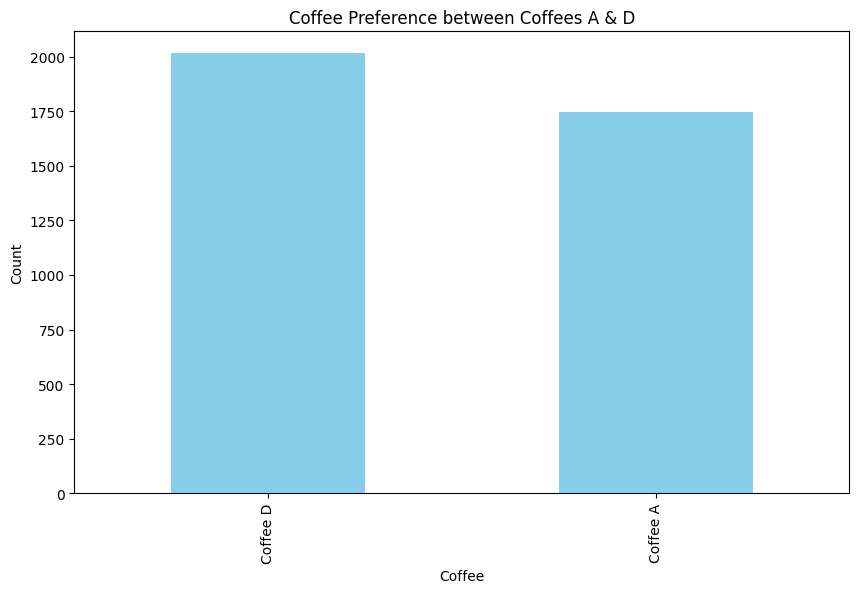

In [17]:
# Create a new plot
plt.figure(figsize=(6,4))

# Create a bar chart of the Coffees to see which had the most votes
# First, get the counts of each group
ad_counts = coffee_data['Between Coffee A and Coffee D, which did you prefer?'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
ad_counts.plot(kind='bar', color='skyblue')
plt.title('Coffee Preference between Coffees A & D')
plt.xlabel('Coffee')
plt.ylabel('Count')
plt.show()

**Observation:** This now this weighs more towards Coffee D, but not a big difference between the two.

## Lastly, what was your favorite overall coffee?

<Figure size 600x400 with 0 Axes>

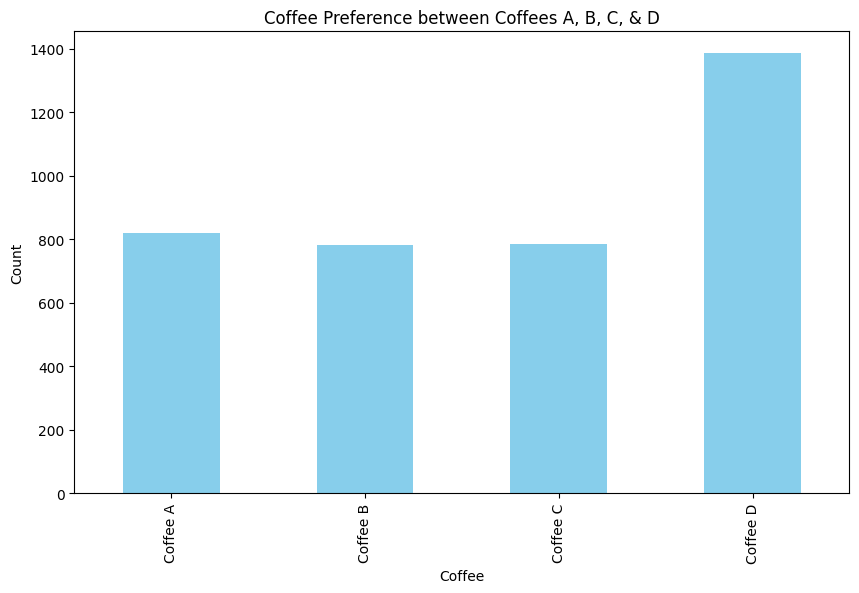

In [18]:
# Create a new plot
plt.figure(figsize=(6,4))

# Define custom order for the levels of coffee strength
custom_order = ['Coffee A', 'Coffee B', 'Coffee C', 'Coffee D']

# Create a bar chart of the Coffees to see which had the most votes
abcd_counts = coffee_data['Lastly, what was your favorite overall coffee?'].value_counts()

# Create a categorical data type with the custom order
abcd_counts.index = pd.CategoricalIndex(abcd_counts.index, categories=custom_order, ordered=True)

# Sort the values based on the custom order
abcd_counts = abcd_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
abcd_counts.plot(kind='bar', color='skyblue')
plt.title('Coffee Preference between Coffees A, B, C, & D')
plt.xlabel('Coffee')
plt.ylabel('Count')
plt.show()

**Observation:** Coffee D outweighed all the other choices, the other choices remaining nearly equal in their distributions.

**Insights:** This is very intriguing information about Coffee D, and we'll need to investigate a bit further to better understand the participant's preferences around this coffee.

## Let's take a look at the Coffee Preference by Gender

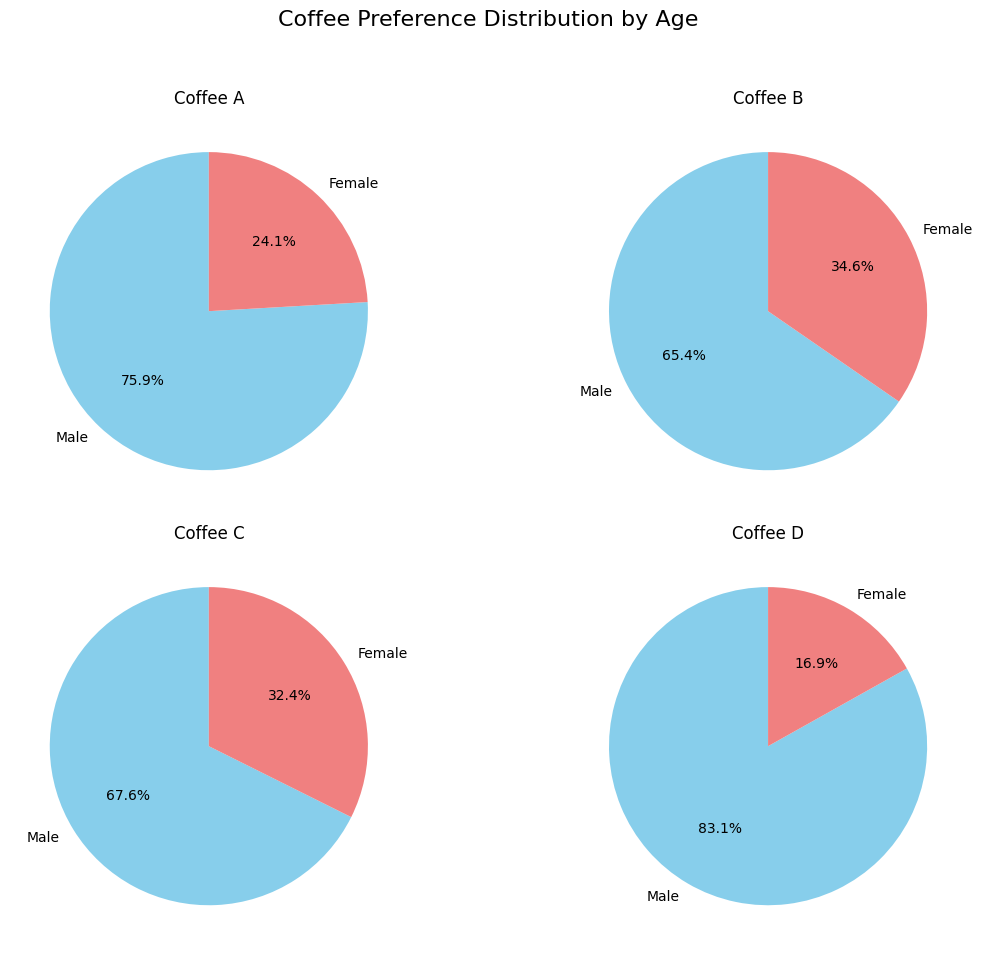

In [19]:
# Filter data for 'Male' and 'Female' genders
filtered_data = coffee_data[coffee_data['Gender'].isin(['Male', 'Female'])]

# List of unique coffee preferences excluding nan
coffee_preferences = filtered_data['Lastly, what was your favorite overall coffee?'].unique()
coffee_preferences = coffee_preferences[~pd.isna(coffee_preferences)]
coffee_preferences = sorted(coffee_preferences)  # Sort alphabetically

# Create subplots for each coffee preference
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Coffee Preference Distribution by Age', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot a pie chart for each coffee preference
for i, coffee_pref in enumerate(coffee_preferences):
    ax = axes[i]
    
    # Filter data for the specific coffee preference
    coffee_pref_data = filtered_data[filtered_data['Lastly, what was your favorite overall coffee?'] == coffee_pref]
    
    # Create a pie chart for the distribution by gender
    gender_counts = coffee_pref_data['Gender'].value_counts()
    ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    ax.set_title(coffee_pref)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observation:** This shows that more females prefer Coffees B & C and they least prefer Coffee D.

**Insights:** Originally, I had assumed that taste preferences would be more agnostic between genders, but with this sample of data for this test it's not the case.

Coffee D (Naturals) should not be a 'default' option, I'd recommend a Medium roast according to this dataset, because some coffee drinkers (particularly females) would not prefer these funky flavors.

## Let's now take a look at Coffee Preference by Age

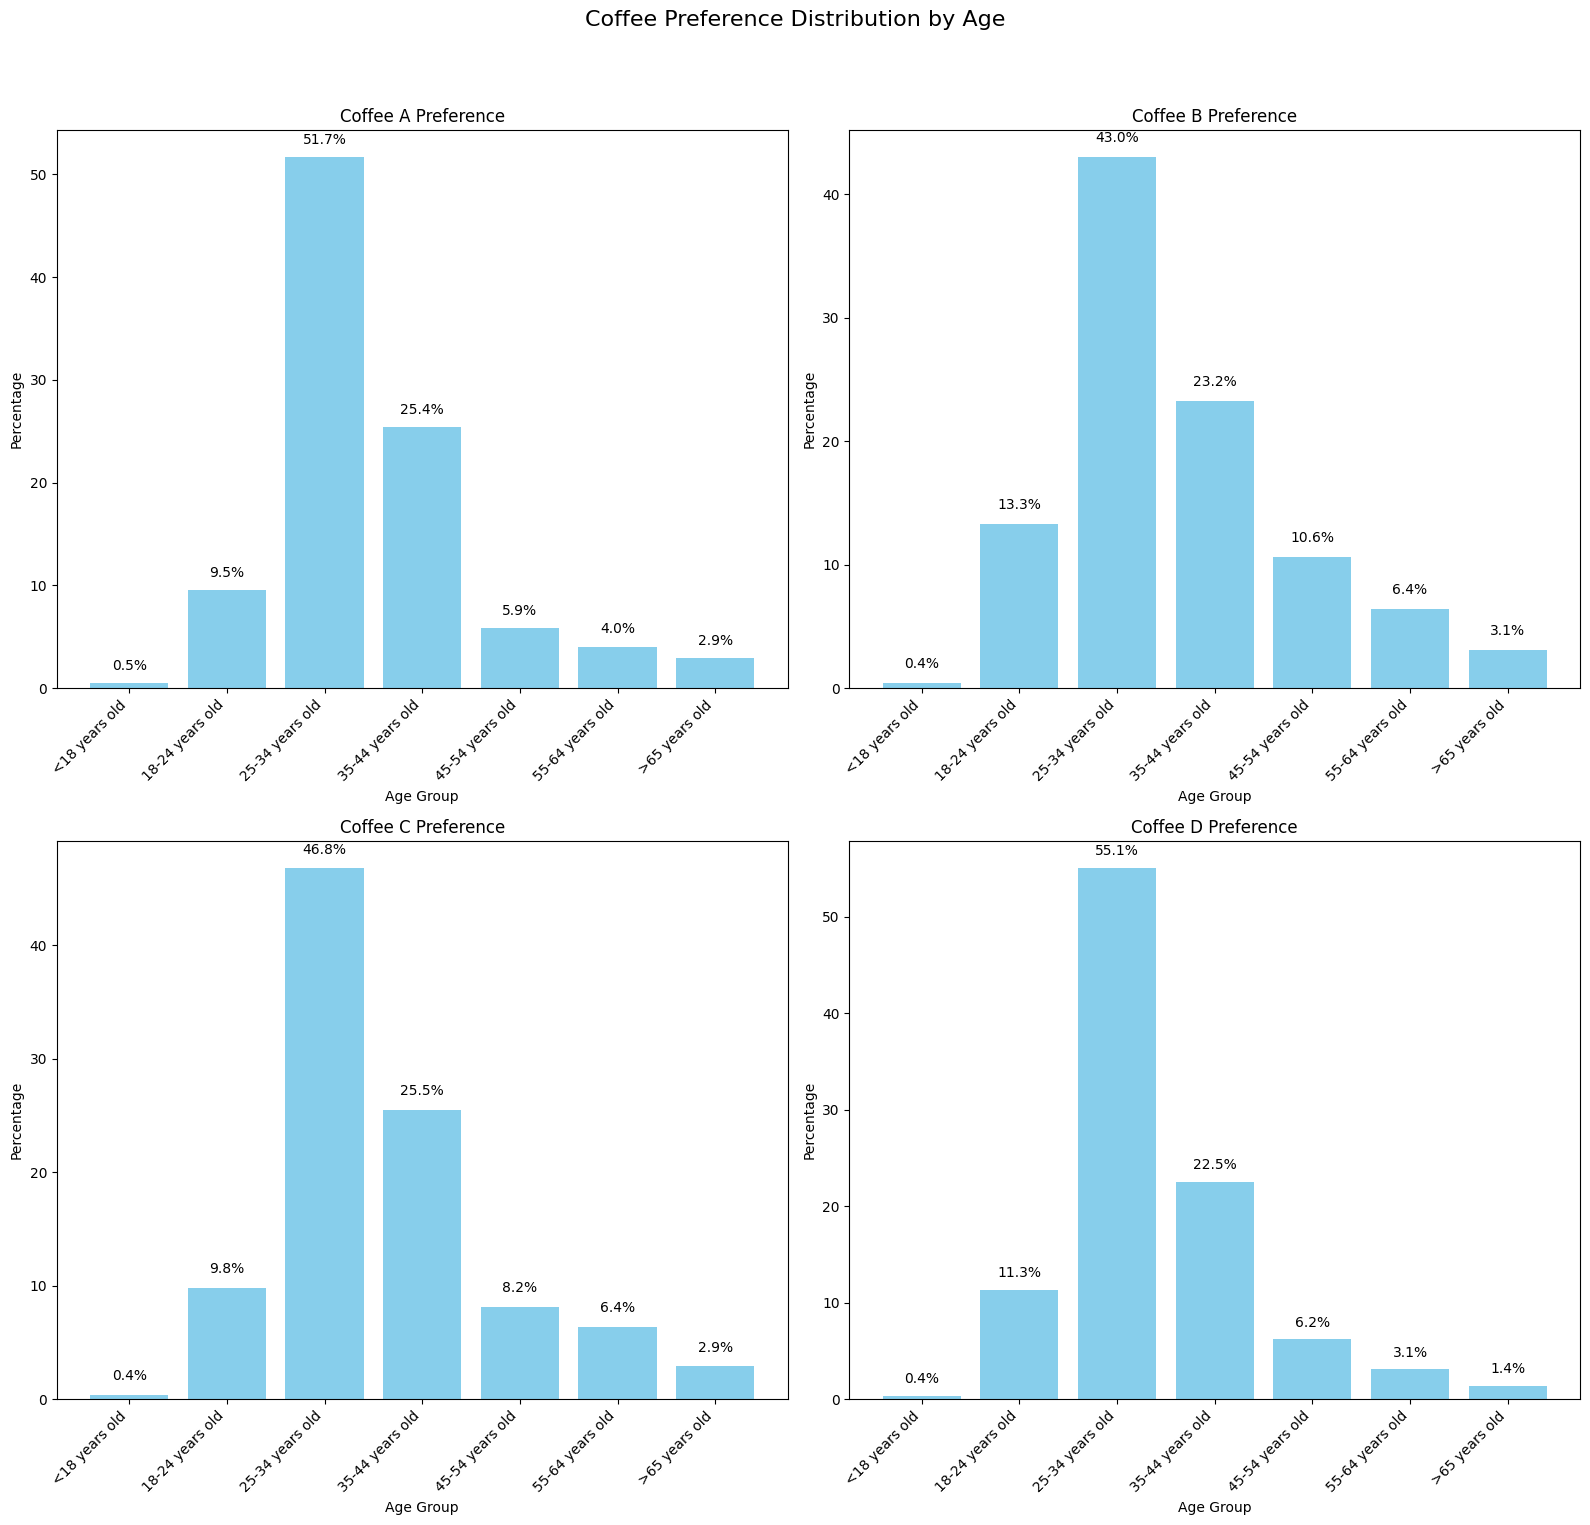

In [20]:
# Define the desired order for age groups
age_order = ['<18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '>65 years old']

# List of unique coffee preferences excluding nan
coffee_preferences = coffee_data['Lastly, what was your favorite overall coffee?'].unique()
coffee_preferences = coffee_preferences[~pd.isna(coffee_preferences)]
coffee_preferences = sorted(coffee_preferences)  # Sort alphabetically

# Create subplots for each coffee preference
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
fig.suptitle('Coffee Preference Distribution by Age', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot a bar chart for each coffee preference within the age distribution with percentages
for i, coffee_pref in enumerate(coffee_preferences):
    ax = axes[i]
    
    # Filter data for the specific coffee preference
    coffee_pref_data = coffee_data[coffee_data['Lastly, what was your favorite overall coffee?'] == coffee_pref]
    
    # Calculate percentages for each age group
    total_responses = len(coffee_pref_data)
    age_percentages = (coffee_pref_data['What is your age?'].value_counts() / total_responses * 100).loc[age_order]

    # Create a bar chart with percentages
    bars = ax.bar(age_percentages.index, age_percentages, color='skyblue')
    
    # Display percentages on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

    ax.set_title(f'{coffee_pref} Preference')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Percentage')
    
    # Set xticks and xticklabels separately
    ax.set_xticks(range(len(age_percentages)))
    ax.set_xticklabels(age_percentages.index, rotation=45, ha='right')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observation:** 
* Here we can see that 25-34 year olds held the highest percentages among each Coffee, being that they were half of our sample data.
* We can also see that Coffees B & D had a higher percentage of 18-24 year olds who preferred these coffees, with Coffee D preferred by far fewer 45+ participants.

**Insights:** This indicates that Coffee D is likely to be more catered towards a younger demographic and would not be something to generally recommend or market towards an older demographic. You would be much safer in presuming older demographics (or anyone in particular for that matter) Coffee B, a Medium Roast, which tends to hold well among all ages.

## Let's now breakdown Coffee Preference by Expertise Level

<Figure size 1400x800 with 0 Axes>

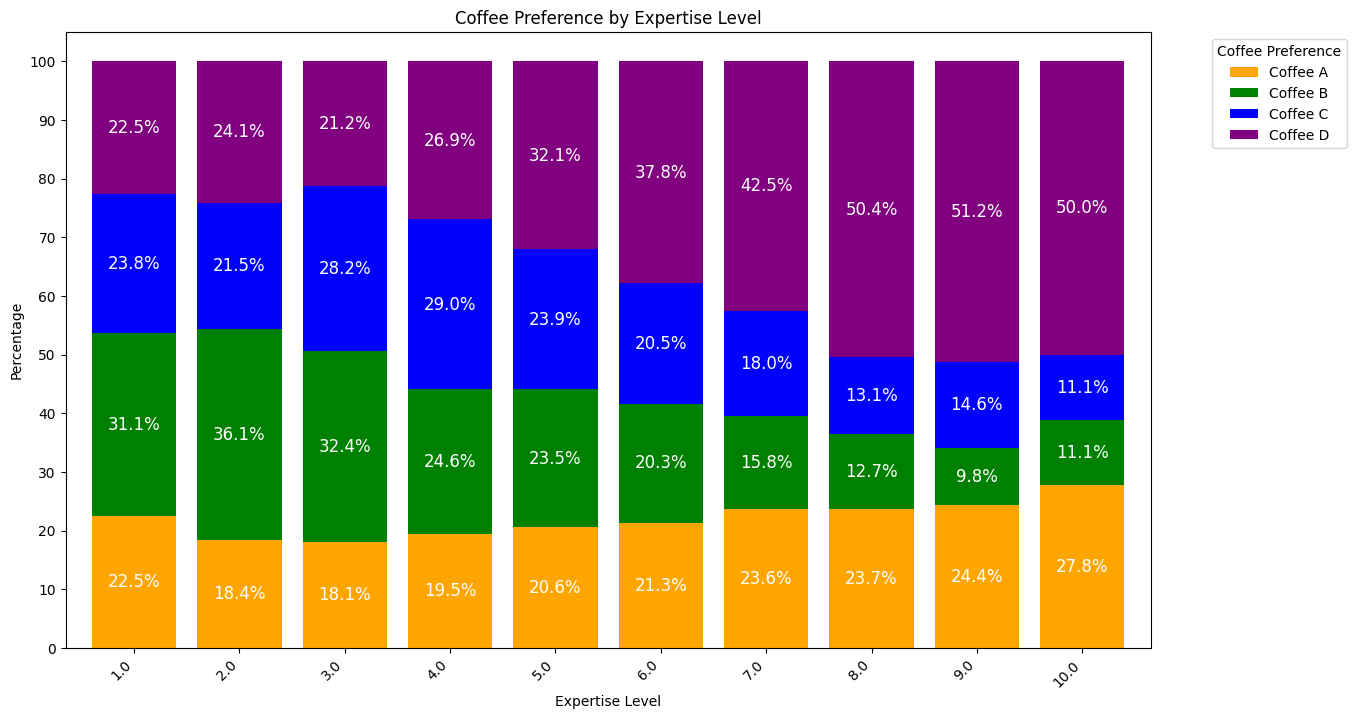

In [21]:
# Select relevant columns for coffee preference and expertise level
columns_of_interest = [
    'Lastly, what was your favorite overall coffee?',
    'Lastly, how would you rate your own coffee expertise?',
    'Coffee A - Personal Preference',
    'Coffee B - Personal Preference',
    'Coffee C - Personal Preference',
    'Coffee D - Personal Preference',
]

# Filter the DataFrame to include only relevant columns
filtered_coffee_data = coffee_data[columns_of_interest].dropna()

# Create a DataFrame for coffee preference by expertise level
coffee_pref_by_lvl = pd.crosstab(filtered_coffee_data['Lastly, how would you rate your own coffee expertise?'], filtered_coffee_data['Lastly, what was your favorite overall coffee?'])

# Calculate percentages for each coffee preference within each expertise level
percentage_lvl_counts = coffee_pref_by_lvl.div(coffee_pref_by_lvl.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
plt.figure(figsize=(14, 8))
ax = percentage_lvl_counts.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8, color=['orange', 'green', 'blue', 'purple'])

# Add percentage labels on top of each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    # Set label color to light grey for better visibility
    label_color = 'lightgrey'

    # Center the percentage label within each bar
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='white', fontsize=12)

plt.title('Coffee Preference by Expertise Level')
plt.xlabel('Expertise Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 101, 10))  # Set y-axis ticks to show percentages (0% to 100%)
plt.legend(title='Coffee Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observation:** We can see that the higher the level in Expertise, the more participants prefer Coffee D, the same is similarly true for Coffee A, but a smaller percentage. We see the inverse to be true fro Coffees B and C, where people who prefer these coffees tend to have a lower level of expertise.

**Insights:** This data could indicate that the more time you spend drinking and learning about coffee, the more you start leaning towards fermented roasts and lighter coffees, usually with more funky or noteable flavors.

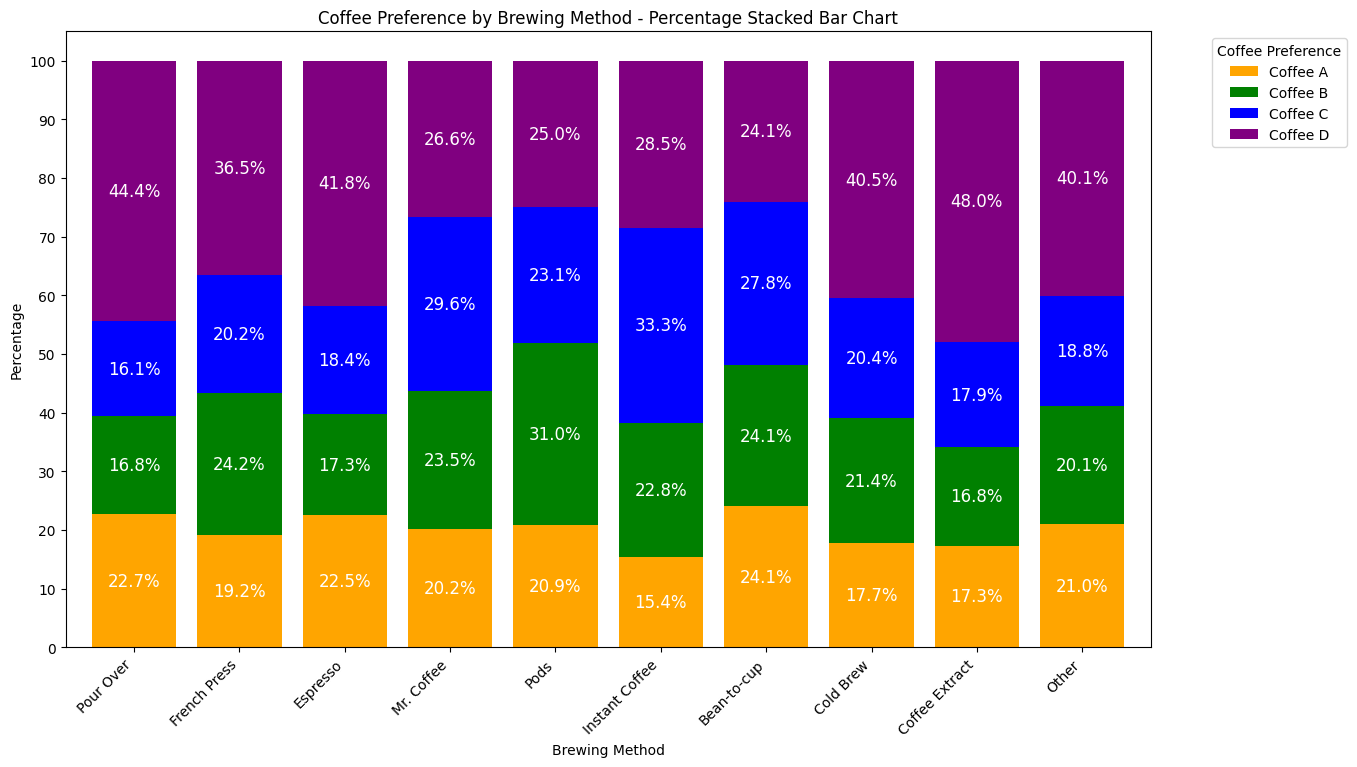

In [22]:
# Combine counts for all brewing methods into a single DataFrame
brewing_counts = pd.DataFrame()

# Loop through each brewing method and calculate the counts for each coffee preference
for brewing_method in brewing_columns:
    counts = coffee_data.groupby('Lastly, what was your favorite overall coffee?')[brewing_method].sum()
    brewing_counts[custom_labels[brewing_columns.index(brewing_method)]] = counts

# Calculate percentages for each coffee preference within each brewing method
percentage_brewing_counts = brewing_counts.div(brewing_counts.sum(axis=0), axis=1) * 100

# Plot the percentage stacked bar chart without "Total Votes" legend
ax = percentage_brewing_counts.transpose().plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8, color=['orange', 'green', 'blue', 'purple'])

ax.set_title('Coffee Preference by Brewing Method - Percentage Stacked Bar Chart')
ax.set_xlabel('Brewing Method')
ax.set_ylabel('Percentage')
ax.legend(title='Coffee Preference', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with percentage labels in white color
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color='white', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 101, 10))  # Set y-axis ticks to show percentages (0% to 100%)
plt.show()


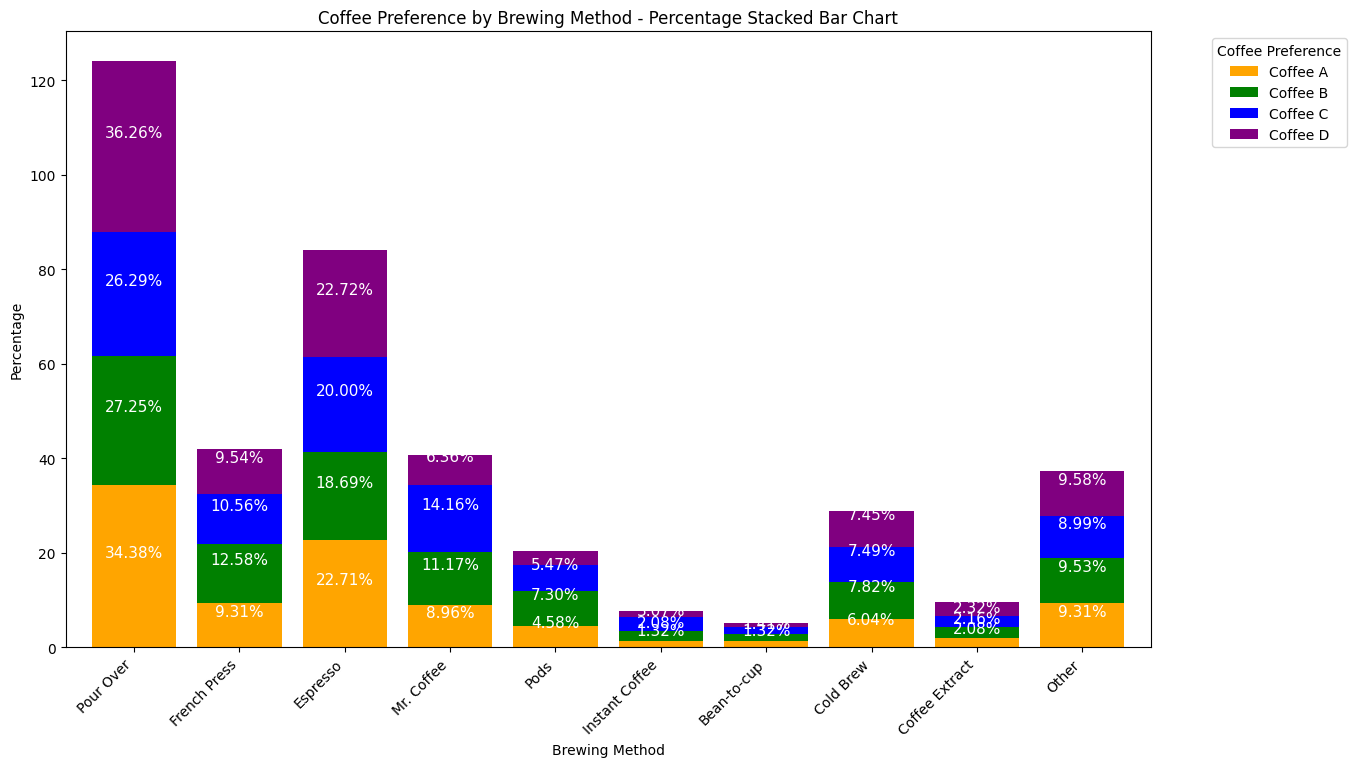

In [23]:
# Combine counts for all brewing methods into a single DataFrame
brewing_counts = pd.DataFrame()

# Loop through each brewing method and calculate the counts for each coffee preference
for brewing_method in brewing_columns:
    counts = coffee_data.groupby('Lastly, what was your favorite overall coffee?')[brewing_method].sum()
    brewing_counts[custom_labels[brewing_columns.index(brewing_method)]] = counts

# Calculate percentages for Coffee Preference by Brewing Method
percentage_brewing_counts = brewing_counts.div(brewing_counts.sum(axis=1), axis=0) * 100

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the percentage stacked bar chart without "Total Votes" legend
ax = percentage_brewing_counts.transpose().plot(kind='bar', stacked=True, ax=ax, width=0.8, color=['orange', 'green', 'blue', 'purple'])

ax.set_title('Coffee Preference by Brewing Method - Percentage Stacked Bar Chart')
ax.set_xlabel('Brewing Method')
ax.set_ylabel('Percentage')
ax.legend(title='Coffee Preference', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display percentages on top of each bar (centered)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='white', fontsize=11)

plt.xticks(rotation=45, ha='right')
plt.show()

**Observation:** We can see that among the different brewing methods participants use, there are varying coffee preferences.

* Pour Over & Espresso show more preference towards Coffees A & D, whereas we see the opposite with Mr. Coffee (Coffee Maker) & even with French Press.

**Insights:** This could indicate that, again, our more experienced coffee drinkers tend use the more advanced brewing methods (Pour Over & Espresso) and are the same ones who lean towards Coffee A & D. Indicating that they're less likely to use a Coffee Maker for these types of coffees so they can process the coffee in a way that extracts the flavors with the utmost scrutiny. Coffee Makers lend themeselves to be a more traditional brewing method and may not be the best way to brew your coffee if you want to get the highest quality flavor and notes.

## Lastly, we'll take a look at Coffee Preference by Coffee Level Preference

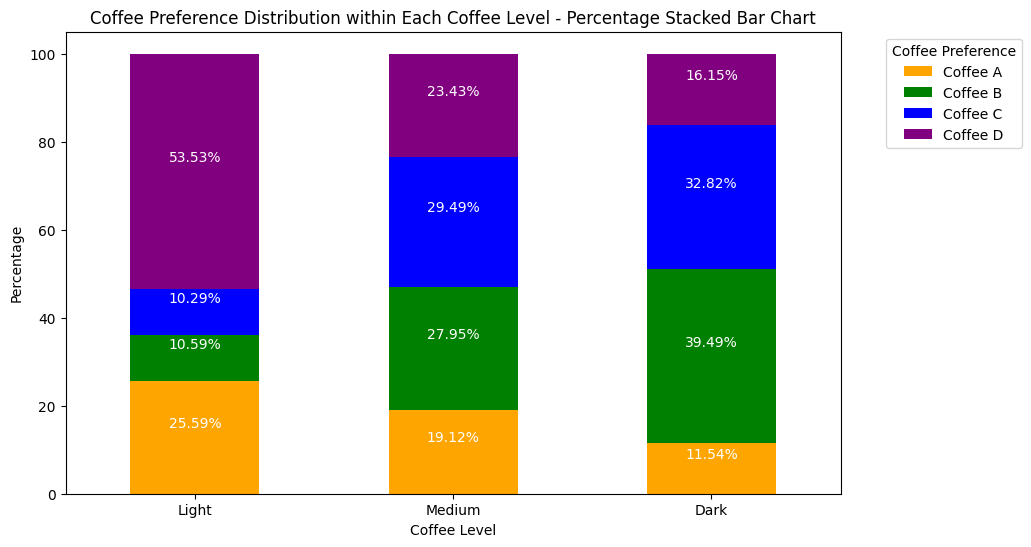

In [24]:
# Filter data for 'Light', 'Medium', 'Dark' levels
filtered_data = coffee_data[coffee_data['What roast level of coffee do you prefer?'].isin(['Light', 'Medium', 'Dark'])]

# Define the desired order for coffee levels
level_order = ['Light', 'Medium', 'Dark']

# List of unique coffee preferences excluding nan
coffee_preferences = filtered_data['Lastly, what was your favorite overall coffee?'].unique()
coffee_preferences = coffee_preferences[~pd.isna(coffee_preferences)]
coffee_preferences = sorted(coffee_preferences)  # Sort alphabetically

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Pivot the data to get counts for each combination of Coffee Level and Coffee Preference
pivot_data = filtered_data.groupby(['What roast level of coffee do you prefer?', 'Lastly, what was your favorite overall coffee?']).size().unstack()

# Calculate percentages
percentage_data = (pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100).loc[level_order]

# Plot the percentage stacked bar chart
percentage_data.plot(kind='bar', stacked=True, ax=ax, color=['orange', 'green', 'blue', 'purple'])

# Set labels and title
ax.set_title('Coffee Preference Distribution within Each Coffee Level - Percentage Stacked Bar Chart')
ax.set_xlabel('Coffee Level')
ax.set_ylabel('Percentage')

# Display legend outside the plot
ax.legend(title='Coffee Preference', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='white')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.show()

**Observation:** The most popular coffee for those who prefer Light Roasts were Coffees D & A, the light roasted coffees (Washed / Natural). However, those who prefer Medium Roasts actually preferred Coffee C (Dark Roast) slightly more than Coffee B (Medium Roast). And for those who prefer Dark Roasts actually preferred Coffee B (Medium Roast) the most.

**Insights:** This is like I had mentioned earlier, Medium & Dark roasts can be misconstrued and sometimes blended in flavors between Medium, Medium-Dark, Dark and are not as helpful in terminology for determining what the flavor will taste like to each coffee drinker.

# How can we use this data analysis?

This data analysis can be used to help instruct businesses and their internal teams, Product & Marketing, to better understand their customer's taste preferences and consumption behavior.

This information can be used to:
* Predict customer purchase behavior from consumption patterns
* Generate personas for generating segmented experiences and campaigns. 
* Create segmented online shopping experiences for users based on taste preferences, brewing methods, experience levels, etc.
* Run segmented marketing campaigns with specific messaging tied closely to each persona.
* Consider product-market fit with your business model. Conduct an assessment of your current product inventory and how to offer more of what your target audience needs or is looking for.

The data can be used for other various findings, should other questions be asked that weren't already done so in this project.

I hope you found this to be insightful.